In [1]:
import pandas
from IPython.display import clear_output
import matplotlib.pyplot as plt
from praveganb.idracdemo import *
import collections
%matplotlib inline

In [2]:
idracdata = IdracData(scope='idracdemo', stream='idracdata', gateway='pravega-grpc-gateway:80')

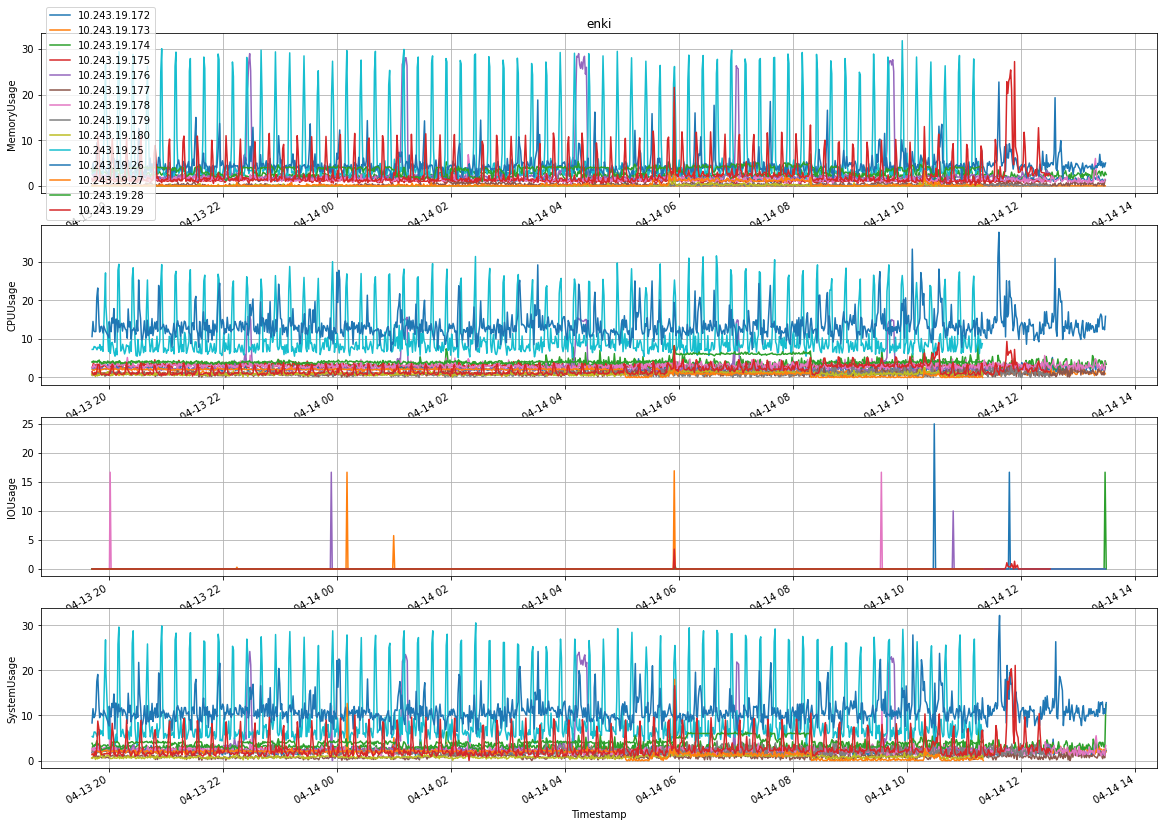

In [ ]:
%store -r stream_end
read_events = idracdata.get_data_from_idrac_generator_by_id(from_stream_cut=stream_end,
                                        data_id='CUPS',
                                        rack_label='enki')
data  = dict.fromkeys(['MemoryUsage', 'CPUUsage', 'IOUsage', 'SystemUsage'], dict())

for k, v in data.items():
    data[k] = pandas.DataFrame() 

for _report in read_events:
    clear_output(wait=True)
    fig, axes = plt.subplots(nrows=len(data), ncols=1)
    df = pandas.DataFrame(_report, index=[1])
    df['Timestamp'] = pandas.to_datetime(df['Timestamp'],
                               format="%Y-%m-%dT%H:%M:%S.%fZ")
    df.set_index('Timestamp', inplace=True)
    if data[_report['MetricId']].empty:
        data[_report['MetricId']] = df
    else:
        data[_report['MetricId']] = data[_report['MetricId']].append(df)
    i = 0
    for k, v in data.items():
        if data[k].empty:
            continue
        data[k].groupby('RemoteAddr')['avg'].plot(ax=axes[i], figsize=(20,15), grid=True)
        
        axes[i].set_ylabel(k)
        if i == 0 :
            axes[i].set_title('enki')
            axes[i].legend(loc='center left')
        i+=1
    plt.show()
    